# CPLEX example

This notebook demonstrates how to use `OptiWindNet` to design collector system cable layouts using the `MILPRouter` with cplex solver.

## Load data

import required modules

In [11]:
from optiwindnet.api import WindFarmNetwork, EWRouter, MILPRouter

In [12]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

create an instance of `wfn` using `.from_pbf()`


In [13]:
wfn = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)

## Optimize

Warmstart with `EWRouter`:

In [14]:
res_warmstart= wfn.optimize(router=EWRouter())
wfn.length()

1820.1681190424422

In [ ]:
milp_router = MILPRouter(solver_name='cplex', time_limit=60, mip_gap=0.005, verbose=True)
res = wfn.optimize(router=milp_router)

Using warm start: the model is initialized with the provided solution S.

Version identifier: 22.1.2.0 | 2024-11-25 | 0edbb82fd
CPXPARAM_Read_DataCheck                          1
CPXPARAM_Parallel                                -1
CPXPARAM_Emphasis_MIP                            4
CPXPARAM_TimeLimit                               20
CPXPARAM_MIP_Tolerances_MIPGap                   0.002
1 of 1 MIP starts provided solutions.
MIP start 'm1' defined initial solution with objective 1636.5551.
Tried aggregator 1 time.
MIP Presolve eliminated 120 rows and 0 columns.
MIP Presolve modified 354 coefficients.
Reduced MIP has 972 rows, 708 columns, and 3368 nonzeros.
Reduced MIP has 354 binaries, 354 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (2.40 ticks)
Probing time = 0.00 sec. (1.98 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 972 rows, 708 columns, and 3368 nonzeros.
Reduced MIP has 354 binaries, 354 generals, 0 SOSs, and 0 indicators.
Presolve tim

In [16]:
wfn.G.SolutionInfo

SolutionInfo(runtime=11.117464065551758, bound=1572.2090545685278, objective=1575.3554359240072, relgap=0.001997251720932347, termination='optimal')

In [17]:
wfn.length()

1575.355435924007

<Axes: >

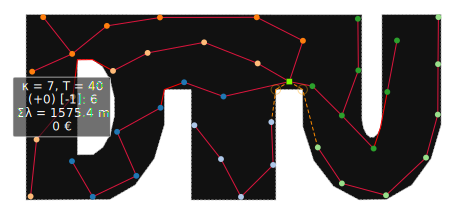

In [18]:
wfn.plot()